In [55]:
# Import Dependencies
import warnings
warnings.filterwarnings('ignore')

In [56]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [57]:
canna_data = pd.read_csv("../clean_data.csv")

In [58]:
canna_data.head()

,Unnamed: 0,City,State,Legal Status,Legal Status Code,Population,Violent Crime per Capita,Rape per Capita,Robbery per Capita,Aggravated Assault per Capita,Property Crime Total per Capita,Burglary per Capita,Larceny-Theft per Capita,Motor Vehicle Theft per Capita
0,0,Cedar Bluff,Alabama,Illegal,1.0,1823.0,0.002194,0.000000,0.000000,0.002194,0.019748,0.003840,0.014262,0.001646
1,1,Centre,Alabama,Illegal,1.0,3547.0,0.005639,0.001128,0.000000,0.004511,0.034959,0.003383,0.027347,0.004229
2,2,Daleville,Alabama,Illegal,1.0,5080.0,0.003150,0.000000,0.000197,0.002953,0.019291,0.003740,0.014173,0.001378
3,3,Enterprise,Alabama,Illegal,1.0,28569.0,0.004480,0.000595,0.000315,0.003500,0.025027,0.003395,0.019952,0.001680
4,4,Eufaula,Alabama,Illegal,1.0,11568.0,0.008212,0.000778,0.001297,0.005878,0.039419,0.008212,0.027490,0.003717


In [59]:
canna_data[canna_data["Legal Status"]=="Illegal"]["State"].nunique()

14

AttributeError: 'DataFrame' object has no attribute 'set_ylim'

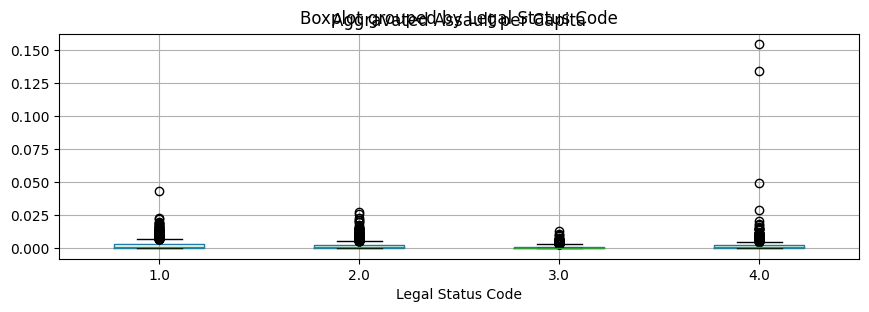

In [60]:
# Create a boxplot to compare means
canna_data.boxplot("Aggravated Assault per Capita", by="Legal Status Code", figsize=(10, 3))
canna_data.set_ylim(0, 0.5)

In [61]:
# Extract individual groups
group1aa = canna_data[canna_data["Legal Status Code"] == 1]["Aggravated Assault per Capita"]
group2aa = canna_data[canna_data["Legal Status Code"] == 2]["Aggravated Assault per Capita"]
group3aa = canna_data[canna_data["Legal Status Code"] == 3]["Aggravated Assault per Capita"]
group4aa = canna_data[canna_data["Legal Status Code"] == 4]["Aggravated Assault per Capita"]

In [62]:
# Perform the ANOVA
stats.f_oneway(group1aa, group2aa, group3aa, group4aa)

F_onewayResult(statistic=25.85015677348019, pvalue=1.259094890475868e-16)

In [63]:
groups = canna_data["Legal Status Code"]

In [64]:
data = canna_data["Aggravated Assault per Capita"]

In [65]:
# Perform the Tukey's HSD test
tukey = pairwise_tukeyhsd(data, groups)

# Print the results
print(tukey.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.0004 0.0005 -0.0007 -0.0001   True
   1.0    3.0  -0.0013    0.0 -0.0017 -0.0009   True
   1.0    4.0  -0.0003 0.0466 -0.0006    -0.0   True
   2.0    3.0  -0.0009    0.0 -0.0013 -0.0005   True
   2.0    4.0   0.0001 0.7143 -0.0002  0.0004  False
   3.0    4.0    0.001    0.0  0.0006  0.0014   True
----------------------------------------------------


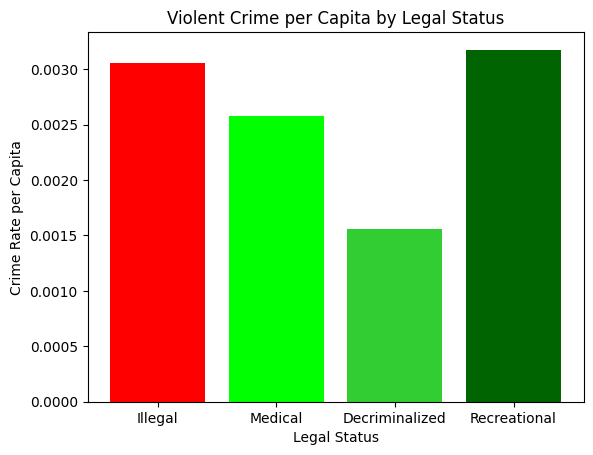

In [66]:
y_axis= "Violent Crime per Capita"

population1 = canna_data[canna_data["Legal Status Code"] == 1][y_axis]
population2 = canna_data[canna_data["Legal Status Code"] == 2][y_axis]
population3 = canna_data[canna_data["Legal Status Code"] == 3][y_axis]
population4 = canna_data[canna_data["Legal Status Code"] == 4][y_axis]


aapc_series = pd.Series([population1.mean(), population2.mean(), population3.mean(), population4.mean()])

aapc_series.index = ["Illegal", "Medical", "Decriminalized", "Recreational"]

plt.bar(aapc_series.index, aapc_series.values, color = ['red', 'lime', 'limegreen', 'darkgreen'])
plt.xlabel('Legal Status')
plt.ylabel('Crime Rate per Capita')
plt.title(f'{y_axis} by Legal Status')
plt.savefig("Graphs/Violent_Crime.png")
plt.show()

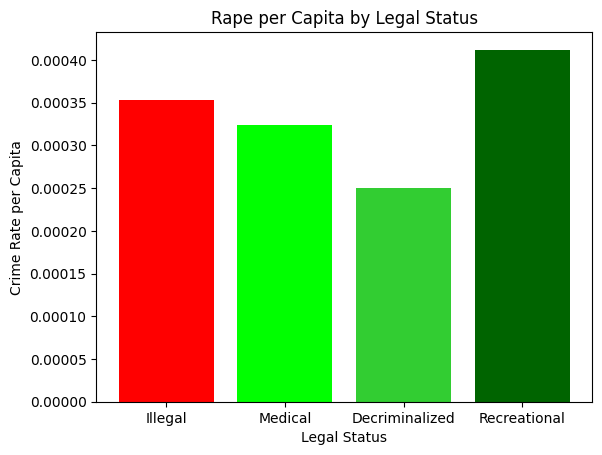

In [67]:
y_axis= "Rape per Capita"

population1 = canna_data[canna_data["Legal Status Code"] == 1][y_axis]
population2 = canna_data[canna_data["Legal Status Code"] == 2][y_axis]
population3 = canna_data[canna_data["Legal Status Code"] == 3][y_axis]
population4 = canna_data[canna_data["Legal Status Code"] == 4][y_axis]


aapc_series = pd.Series([population1.mean(), population2.mean(), population3.mean(), population4.mean()])

aapc_series.index = ["Illegal", "Medical", "Decriminalized", "Recreational"]

plt.bar(aapc_series.index, aapc_series.values, color = ['red', 'lime', 'limegreen', 'darkgreen'])
plt.xlabel('Legal Status')
plt.ylabel('Crime Rate per Capita')
plt.title(f'{y_axis} by Legal Status')
plt.savefig("Graphs/Rape.png")
plt.show()

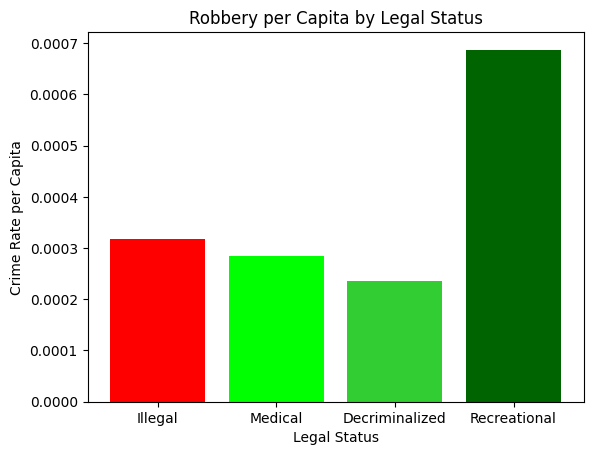

In [68]:
y_axis= "Robbery per Capita"

population1 = canna_data[canna_data["Legal Status Code"] == 1][y_axis]
population2 = canna_data[canna_data["Legal Status Code"] == 2][y_axis]
population3 = canna_data[canna_data["Legal Status Code"] == 3][y_axis]
population4 = canna_data[canna_data["Legal Status Code"] == 4][y_axis]


aapc_series = pd.Series([population1.mean(), population2.mean(), population3.mean(), population4.mean()])

aapc_series.index = ["Illegal", "Medical", "Decriminalized", "Recreational"]

plt.bar(aapc_series.index, aapc_series.values, color = ['red', 'lime', 'limegreen', 'darkgreen'])
plt.xlabel('Legal Status')
plt.ylabel('Crime Rate per Capita')
plt.title(f'{y_axis} by Legal Status')
plt.savefig("Graphs/Robbery.png")
plt.show()

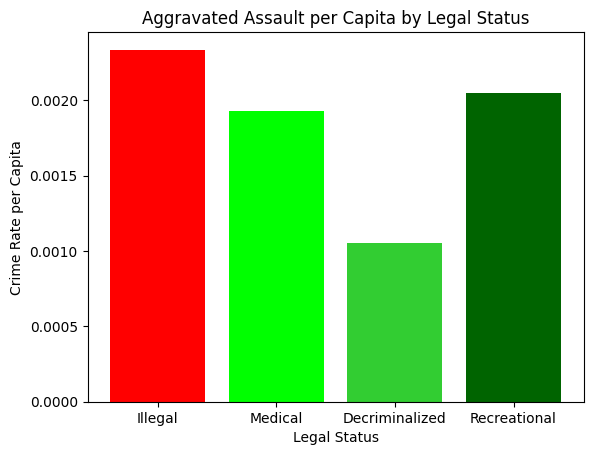

In [69]:
y_axis= "Aggravated Assault per Capita"

population1 = canna_data[canna_data["Legal Status Code"] == 1][y_axis]
population2 = canna_data[canna_data["Legal Status Code"] == 2][y_axis]
population3 = canna_data[canna_data["Legal Status Code"] == 3][y_axis]
population4 = canna_data[canna_data["Legal Status Code"] == 4][y_axis]


aapc_series = pd.Series([population1.mean(), population2.mean(), population3.mean(), population4.mean()])

aapc_series.index = ["Illegal", "Medical", "Decriminalized", "Recreational"]

plt.bar(aapc_series.index, aapc_series.values, color = ['red', 'lime', 'limegreen', 'darkgreen'])
plt.xlabel('Legal Status')
plt.ylabel('Crime Rate per Capita')
plt.title(f'{y_axis} by Legal Status')
plt.savefig("Graphs/Aggravated_Assault.png")
plt.show()

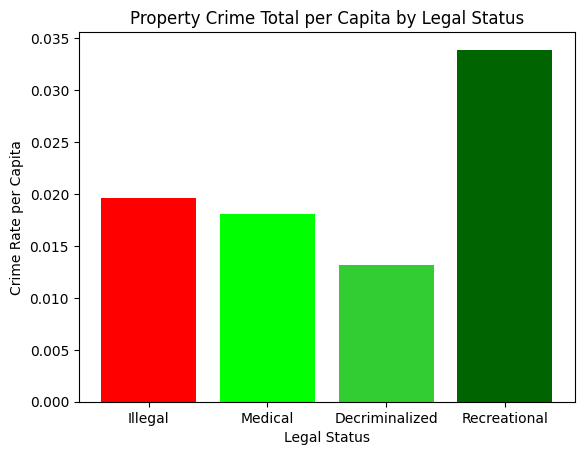

In [70]:
y_axis= "Property Crime Total per Capita"

population1 = canna_data[canna_data["Legal Status Code"] == 1][y_axis]
population2 = canna_data[canna_data["Legal Status Code"] == 2][y_axis]
population3 = canna_data[canna_data["Legal Status Code"] == 3][y_axis]
population4 = canna_data[canna_data["Legal Status Code"] == 4][y_axis]


aapc_series = pd.Series([population1.mean(), population2.mean(), population3.mean(), population4.mean()])

aapc_series.index = ["Illegal", "Medical", "Decriminalized", "Recreational"]

plt.bar(aapc_series.index, aapc_series.values, color = ['red', 'lime', 'limegreen', 'darkgreen'])
plt.xlabel('Legal Status')
plt.ylabel('Crime Rate per Capita')
plt.title(f'{y_axis} by Legal Status')
plt.savefig("Graphs/Property_Crime.png")
plt.show()

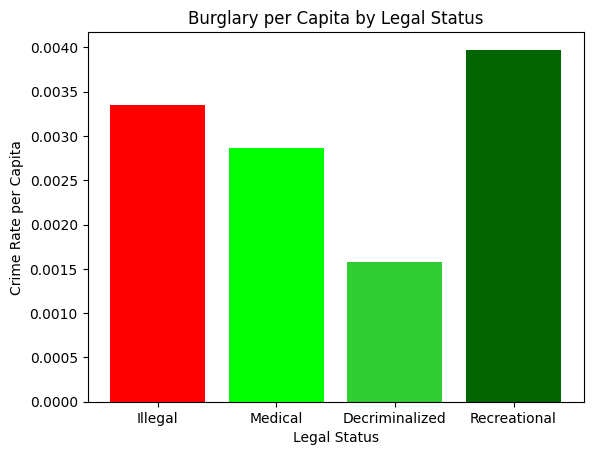

In [71]:
y_axis= "Burglary per Capita"

population1 = canna_data[canna_data["Legal Status Code"] == 1][y_axis]
population2 = canna_data[canna_data["Legal Status Code"] == 2][y_axis]
population3 = canna_data[canna_data["Legal Status Code"] == 3][y_axis]
population4 = canna_data[canna_data["Legal Status Code"] == 4][y_axis]


aapc_series = pd.Series([population1.mean(), population2.mean(), population3.mean(), population4.mean()])

aapc_series.index = ["Illegal", "Medical", "Decriminalized", "Recreational"]

plt.bar(aapc_series.index, aapc_series.values, color = ['red', 'lime', 'limegreen', 'darkgreen'])
plt.xlabel('Legal Status')
plt.ylabel('Crime Rate per Capita')
plt.title(f'{y_axis} by Legal Status')
plt.savefig("Graphs/Burglary.png")
plt.show()

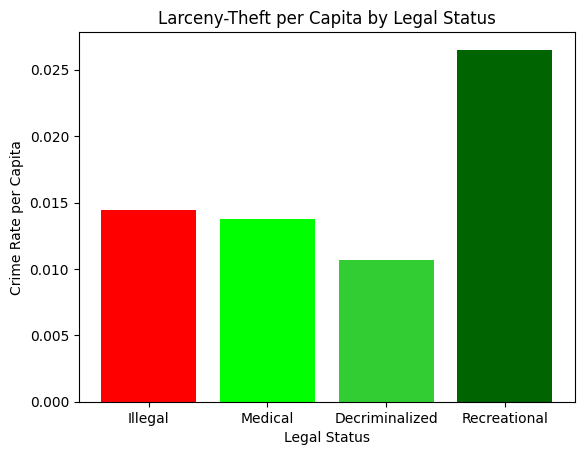

In [72]:
y_axis= "Larceny-Theft per Capita"

population1 = canna_data[canna_data["Legal Status Code"] == 1][y_axis]
population2 = canna_data[canna_data["Legal Status Code"] == 2][y_axis]
population3 = canna_data[canna_data["Legal Status Code"] == 3][y_axis]
population4 = canna_data[canna_data["Legal Status Code"] == 4][y_axis]


aapc_series = pd.Series([population1.mean(), population2.mean(), population3.mean(), population4.mean()])

aapc_series.index = ["Illegal", "Medical", "Decriminalized", "Recreational"]

plt.bar(aapc_series.index, aapc_series.values, color = ['red', 'lime', 'limegreen', 'darkgreen'])
plt.xlabel('Legal Status')
plt.ylabel('Crime Rate per Capita')
plt.title(f'{y_axis} by Legal Status')
plt.savefig("Graphs/Larceny-Theft.png")
plt.show()

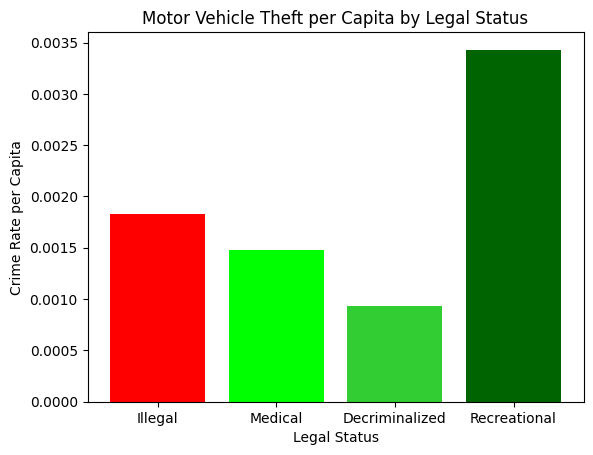

In [73]:
y_axis= "Motor Vehicle Theft per Capita"

population1 = canna_data[canna_data["Legal Status Code"] == 1][y_axis]
population2 = canna_data[canna_data["Legal Status Code"] == 2][y_axis]
population3 = canna_data[canna_data["Legal Status Code"] == 3][y_axis]
population4 = canna_data[canna_data["Legal Status Code"] == 4][y_axis]


aapc_series = pd.Series([population1.mean(), population2.mean(), population3.mean(), population4.mean()])

aapc_series.index = ["Illegal", "Medical", "Decriminalized", "Recreational"]

plt.bar(aapc_series.index, aapc_series.values, color = ['red', 'lime', 'limegreen', 'darkgreen'])
plt.xlabel('Legal Status')
plt.ylabel('Crime Rate per Capita')
plt.title(f'{y_axis} by Legal Status')
plt.savefig("Graphs/Motor_Vehicle_Theft.png")
plt.show()

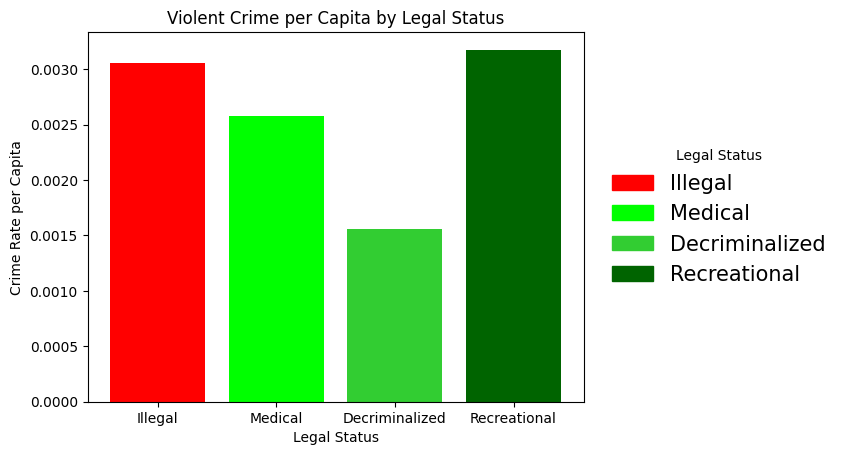

In [74]:
from matplotlib.patches import Patch


y_axis= "Violent Crime per Capita"

population1 = canna_data[canna_data["Legal Status Code"] == 1][y_axis]
population2 = canna_data[canna_data["Legal Status Code"] == 2][y_axis]
population3 = canna_data[canna_data["Legal Status Code"] == 3][y_axis]
population4 = canna_data[canna_data["Legal Status Code"] == 4][y_axis]


aapc_series = pd.Series([population1.mean(), population2.mean(), population3.mean(), population4.mean()])

aapc_series.index = ["Illegal", "Medical", "Decriminalized", "Recreational"]

plt.bar(aapc_series.index, aapc_series.values, color = ['red', 'lime', 'limegreen', 'darkgreen'])
plt.xlabel('Legal Status')
plt.ylabel('Crime Rate per Capita')
plt.title(f'{y_axis} by Legal Status')

# map names to colors
cmap = dict(zip(aapc_series.values, ['red', 'lime', 'limegreen', 'darkgreen']))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]

# add the legend
plt.legend(title='Legal Status', labels=["Illegal", "Medical", "Decriminalized", "Recreational"], handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0, fontsize=15, frameon=False)

plt.savefig("Graphs/Legend.png")
plt.show()

In [77]:
import plotly.express as px
fig = px.choropleth(canna_data,
                    locations=canna_data['State'], 
                    locationmode="USA-states", 
                    scope="usa",
                    color=canna_data['Legal Status Code'],
                    color_continuous_scale=['red', 'lime', 'limegreen', 'darkgreen']
                    )
fig.show()

In [79]:
values = canna_data['State'].tolist()
fips = canna_data['Legal Status Code'].tolist()

colorscale = [
    'lime',
    'limegreen',
    'green',
    'darkgreen'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA', 'AZ', 'Nevada', 'Oregon', ' Idaho'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California and Nearby States'
)
fig.layout.template = None
fig.show()


ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```